#GPT2 Poet Basic Functionality

By [Kian Salamzadeh](https://github.com/kianfucius)

Retrain a generative text neural network using `gpt2-poet`, located in this [Git Repository](https://github.com/kianfucius/gpt2_poet)

It is highly recommended that you run this in a Google Colaboratory environment, which provides free access to their GPU's. This will be essential in finetuning and generating outputs. Unfortunately, pretrained models could not be provided with the github repository, because each model is roughly 500MB in size, which exceeds their [tolerated file size](https://help.github.com/en/github/managing-large-files/what-is-my-disk-quota). Therefore, attempting to reproduce experiments in the report will not provide exactly the same results, but similar outputs are expected. If you require the same finetuned models used in the report, you can contact ksalamza@uoguelph.ca for the files, which total about 5GB in size.

You can copy this file into your Google Drive and run it in your own Google Colab. Make sure the runtime type is set to GPU, by going to [Runtime] -> [Change runtime type]

Finally, note that the code required to run these experiments is quite lengthy, and putting all the source code into this notebook would not provide a healthy user experience. Therefore, all code has been organized into a git repository which is installed in the first code cell. All functions are documented and commented in the git repository linked above.

## Installation and finetuning
To get started, let's clear up our workspace, then install the project.

In [1]:
!rm -r sample_data >/dev/null 2>&1 # delete sample data provided by Google Colab and silence output
!git clone https://github.com/kianfucius/gpt2_poet # clone gpt2 poet
!pip install ./gpt2_poet # install gpt2 poet
import gpt2_poet as gpt2

Cloning into 'gpt2_poet'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 239 (delta 131), reused 176 (delta 73), pack-reused 0
Receiving objects: 100% (239/239), 206.58 KiB | 1.07 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Processing ./gpt2_poet
     |████████████████████████████████| 573kB 8.7MB/s 
     |████████████████████████████████| 1.0MB 22.3MB/s 
     |████████████████████████████████| 890kB 17.4MB/s 
     |████████████████████████████████| 3.7MB 56.0MB/s 
  Created wheel for gpt2-poet: filename=gpt2_poet-0.0.1-cp36-none-any.whl size=6516 sha256=d7078b15d74e8c676f6e7034d810081d18a7e2cae4bed283b4b6a116b88ad822
  Stored in directory: /tmp/pip-ephem-wheel-cache-smtrbfyt/wheels/a6/58/9b/7df6ac2e034594e554d21bafcad48cff298c3dc0cb0a0ff960
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=5fab3ee1a6b167ccf93b6d5a1d17e973b62

The package comes with a sample input csv file, which is formatted appropriately for the inbuilt functions. This data is used for all experiments, and is the same corpus used in the submitted report.

In [0]:
corpus_path = 'gpt2_poet/sample_data/haikus.csv'

This function downloads and stores the model and tokenizer for OpenAI's GPT-2, courtesy of HuggingFace's Transformers. By default, it will download the smallest version of GPT-2, but you can download the medium sized model by passing the argument "gpt2-medium".

Please note that this takes some time to run, depending on your download speed. gpt2-medium will take longer to download because it is larger, and cannot be run from a Google Colaboratory environment due to memory constraints of the system.

In [3]:
model, tokenizer = gpt2.download_model()
#model, tokenizer = gpt2.download_model("gpt2-medium")

You can finetune GPT-2 using this helper function. Make sure to pass it the model and tokenizer we downloaded earlier. 
You can customize the corpus and model output folder, although there is no need if you are following this notebook.

You can also set various hyperparameters, including:
`batch_size`, `epochs`, `learning_rate`, `warmup_steps`, and `max_seq_len`.

Running this for the default amount of epochs (5) takes about 10 minutes. In the mean-time, feel free to write some original haikus!

In [4]:
gpt2.finetune(model, tokenizer, dataset=corpus_path)

EPOCH 0 started==============================
sum loss 519.1138916015625
sum loss 420.30072021484375
sum loss 377.50616455078125
EPOCH 1 started==============================
sum loss 358.488037109375
sum loss 346.16033935546875
sum loss 335.9029846191406
sum loss 332.09136962890625
EPOCH 2 started==============================
sum loss 321.9007568359375
sum loss 316.3227844238281
sum loss 317.9334716796875
sum loss 312.87603759765625
EPOCH 3 started==============================
sum loss 308.6634216308594
sum loss 303.82403564453125
sum loss 303.6766662597656
sum loss 302.281005859375
EPOCH 4 started==============================
sum loss 294.1451721191406
sum loss 292.8934326171875
sum loss 293.07830810546875
sum loss 293.7854919433594


Finally, let's use our trained models to generate some output. Once again, we have to pass it our downloaded model and tokenizer. If you changed your model output folder or want a custom output folder, you can set that too.

We can tell the function which model to generate from, the amount of poems to generate, and the output file type (txt or csv). By default, this function expects the models to be stored in the `trained_models` folder, and will write outputs to the `outputs` folder.

By setting `greedy=True`, we can see the model generating output based on a Greedy Best-First Search algorithm. This algorithm always chooses the highest probability token in the sequence, so the output will always be the same for any unique model epoch.

## Introduction to Generation Methods

In [5]:
gpt2.generate(model, tokenizer, model_epoch=4, num_poems=3, file_type='csv', print_output=True, greedy=True)

the first snow
the first light
of a new moon

the first snow
the first light
of a new moon

the first snow
the first light
of a new moon



If we don't set `greedy`, then the value defaults to `False`, in which case a top-p probability search will be used instead for the decoder. This will introduce some randomness and result in more creative outputs:

In [6]:
gpt2.generate(model, tokenizer, model_epoch=4, num_poems=10, file_type='csv', print_output=True)

cabin
a child's shadow casts a shadow
on the fence

winter dusk
the sound of a dog barking
through my hair

crescent moon...
the old dog
grows a bit

first frost
the old man's
piano

summer rain
the old dog's shadow
on the kitchen counter

spring dusk
the old man's dog
gives a whistle

morning
a small child's smile
on her mother's face

winding down the sidewalk??
the smell of hay
in the kitchen window

winter stars
the sound of the boat
from the dock's window

winter sun??
the old dog's shadow
on the porch railing



Transformers also has a really helpful generate function, so I've included a wrapper to use our model and output the files to a specified folder. This function takes many arguments. Here's an example to do a beam search. Notice that the output will be the same no matter how many times you run it.

In [7]:
gpt2.generate_wrapper(model, tokenizer, model_epoch=4, num_poems=10, file_type='txt', print_output=True,
                      num_beams=10, 
                      no_repeat_ngram_size=2, 
                      max_length=50)

summer's end??
the sound of raindrops
on the sidewalk

summer's end??
the sound of raindrops
on the kitchen table

summer's end??
the sound of a dog barking
in the rain

summer's end??
the sound of raindrops
on the beach

summer's end??
the sound of raindrops
on the kitchen floor

summer's end??
the sound of a dog barking
in the streetlight

summer's end??
the sound of raindrops
on the window sill

summer's end??
the sound of raindrops
on the roof

summer's end??
the sound of a dog barking
in the dark

summer's end??
the sound of a dog barking
on the sidewalk



The output is very repetitious. Let's try sampling. You should notice that the output feels much more human. Feel free to mess around with more of these arguments, which you can read about [here.](https://github.com/huggingface/transformers/blob/master/src/transformers/modeling_utils.py)

In [8]:
gpt2.generate_wrapper(model, tokenizer, model_epoch=4, num_poems=5, file_type='txt', print_output=True,
                      do_sample=True, 
                      max_length=50, 
                      top_k=10)

sunlight on the roof...
a butterfly
sends her wings

a few days??
my daughter finds
the last penny

sunrise
the scent of leaves
from the garden gate

autumn wind??
one bird
in a flock of pigeons

a new day
the moon's shadow
caught up



# Analysis
Now that we've seen how GPT2 Poet works, we can analyze the inputs and outputs. 

## Inputs
Let's sidebar for a second - this project includes a function that allows us to count the number of syllables in a string. Let's take a look:

In [9]:
gpt2.syllables("This is a sentence")

5

GPT2-Poet also provides a function to automatically run this on a csv corpus of haikus, to get a 2-D list of the syllables per line, in each haiku.

In [10]:
print(gpt2.get_syllables_list_csv(corpus_path))

[[5, 3, 5], [4, 2, 4], [6, 3, 6], [3, 6, 6], [4, 3, 3], [4, 5, 4], [2, 4, 2], [2, 6, 6], [3, 2, 3], [4, 5, 5], [5, 7, 5], [2, 3, 7], [7, 5, 4], [5, 5, 3], [3, 7, 4], [2, 5, 2], [5, 6, 4], [3, 3, 4], [4, 5, 4], [5, 5, 7], [2, 8, 5], [2, 6, 6], [3, 4, 2], [2, 4, 5], [4, 4, 5], [4, 7, 3], [5, 4, 3], [3, 4, 2], [4, 7, 3], [5, 6, 4], [3, 9, 4], [5, 6, 3], [5, 4, 4], [4, 5, 3], [4, 4, 4], [3, 4, 2], [4, 5, 6], [2, 3, 3], [3, 5, 3], [4, 7, 1], [3, 6, 5], [5, 4, 3], [1, 3, 3], [2, 7, 3], [3, 5, 4], [2, 8, 4], [4, 5, 3], [2, 6, 2], [3, 3, 4], [3, 6, 3], [3, 6, 4], [3, 8, 4], [3, 6, 5], [2, 4, 5], [3, 6, 3], [2, 5, 2], [3, 4, 2], [5, 4, 5], [3, 5, 2], [5, 6, 3], [2, 6, 3], [3, 5, 6], [4, 4, 2], [2, 5, 3], [2, 4, 5], [6, 5, 3], [3, 5, 5], [4, 5, 3], [3, 6, 6], [4, 4, 3], [2, 4, 5], [3, 5, 3], [5, 3, 2], [3, 5, 4], [2, 4, 5], [2, 7, 2], [5, 6, 3], [5, 5, 4], [2, 5, 4], [4, 3, 4], [4, 5, 5], [2, 4, 6], [3, 4, 3], [4, 2, 7], [3, 6, 4], [4, 6, 5], [5, 4, 6], [3, 4, 2], [5, 7, 5], [4, 6, 3], [3, 3, 4]

Finally, we can generate a graph to see the syllable distribution for each line. Analyzing the graphs, we can determine the mode and mean values for the syllable count of each line.

Mean syllables in line 1: 3.643223443223443
Mean syllables in line 2: 5.122710622710622
Mean syllables in line 3: 4.1471306471306475


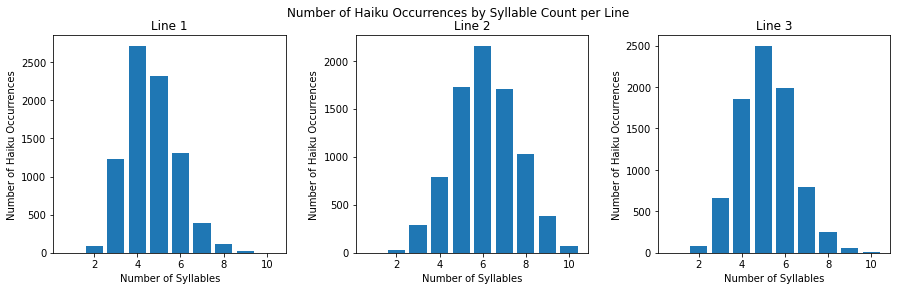

In [11]:
gpt2.make_syllable_graphs(gpt2.get_syllables_list_csv(corpus_path))

As we can see, the input data does not conform to the typically expected 5-7-5 structure. This is because this structure is applicable to the Japanese language, which counts sounds rather than syllables. In English, modern haiku writers have shed these constraints, and follow them only loosely.

We can see that the mode of haiku occurrences per syllable for each line is actually '4-6-5', and the mean value for each line is '3.64-5.12-4.15'. Thankfully, this shouldn't complicate analyzing the output too much, because we can complete these same calculations on the output. Hopefully, the best output will have similar mode and mean values for the syllable count.

## Outputs - Greedy BFS
First, we generate one poem for epochs 2-5. We skip epoch 1, because the output is typically incoherent or not usable. Then, we can count the number of syllables within a line, see how that changes with each epoch, and complete the operation for each line in a haiku.

In [0]:
for i in range (1,5):
  output = gpt2.generate(model, tokenizer, model_epoch=i, num_poems=2, file_type='csv', greedy=True)

[[2 3 3 3]
 [6 4 4 3]
 [3 4 4 4]]


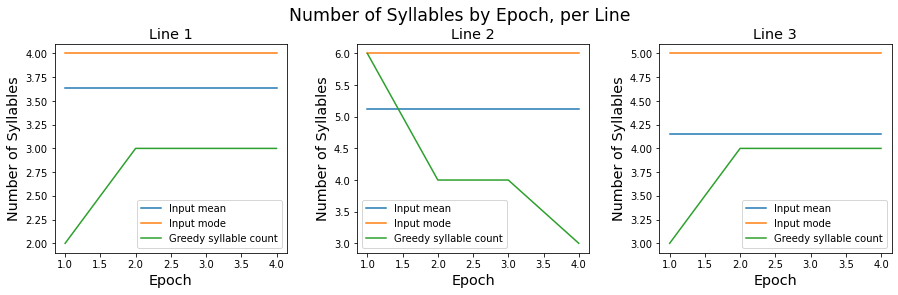

In [13]:
gpt2.analyze_greedy(num_poems=5)

Sadly, the model's perceived best output does not conform to the input data. However, we can examine other decoder methods and see if we get any better results.

## Outputs - Beam Search
We can also generate some outputs for epochs 2-5 for the beam search decoder method. Then, we can generate line graphs to see how the mean number of syllables per line stacks up against our input data.

In [0]:
for i in range (1,5):
  gpt2.generate_wrapper(model, tokenizer, model_epoch=i, num_poems=10, file_type='csv',
                      num_beams=10, 
                      no_repeat_ngram_size=2, 
                      max_length=50)

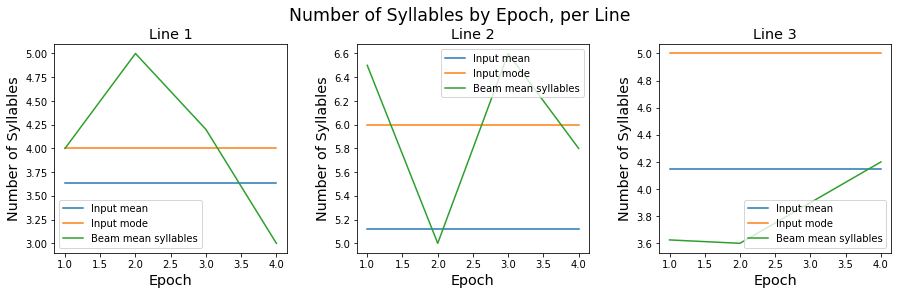

In [15]:
gpt2.analyze_linegraph(poems_folder="wrapper_outputs", line_title="Beam mean syllables")

Once again, the outputs do not tend to get better over time. Rather, it seems the syllable count in each line is somewhat random. Evidently, the model is not learning to produce better haikus.

## Outputs - Top P Search
Let's do the same analysis on our top-p decoder function, for epochs 2-5.

In [0]:
for i in range (1,5):
  gpt2.generate(model, tokenizer, model_epoch=i, num_poems=10, file_type='csv')

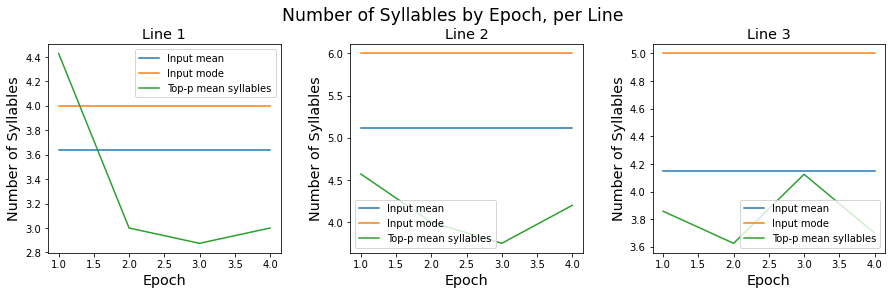

In [17]:
gpt2.analyze_linegraph(line_title="Top-p mean syllables")

For this last experiment, we are able to see much better, more readable outputs.The same trend is observed as with the other two decoder methods.

However, the model does show promise in generating interesting poems. Perhaps with a larger dataset or further development efforts, the model could improve. For further information, please refer to the project report.